<a href="https://colab.research.google.com/github/AManan651/Fake-news-classification-model-/blob/main/FAKE_NEWS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import plotly.express as px
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/WELFake_Dataset.csv')
df.head()

ParserError: Error tokenizing data. C error: EOF inside string starting at row 57309

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [8]:
df['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [9]:
df['text'][72131]

'Migrants Refuse To Leave Train At Refugee Camp In Hungary\n\nThousands of migrants flooded into a train station in the Hungarian capital Thursday after police lifted a two-day blockade, but some who boarded a train they thought was going to Germany ended up instead at a refugee camp just miles from Budapest.\n\nThe Associated Press reports that "excited migrants piled into a newly arrived train at the Keleti station in Hungary\'s capital despite announcements in Hungarian and English that all services from the station to Western Europe had been canceled. A statement on the main departures board said no more trains to Austria or Germany would depart \'due to safety reasons until further notice!\'\n\n"Many migrants, who couldn\'t understand either language and were receiving no advice from Hungarian officials, scrambled aboard in a standing-room-only crush and hoped for the best," the AP said.\n\nScuffles broke out when police ordered the passengers off the train at Bicske, according to

In [11]:
df.drop('Unnamed: 0',axis=1, inplace= True)

In [12]:
df.fillna(' ', inplace=True)

In [14]:
features= df[['text','title']]
lables= df['label']

In [15]:
features

,text,title
0,No comment is expected from Barack Obama Membe...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,Did they post their votes for Hillary already?,
2,"Now, most of the demonstrators gathered last ...",UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,A dozen politically active pastors came here f...,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",SATAN 2: Russia unvelis an image of its terrif...
...,...,...
72129,WASHINGTON (Reuters) - Hackers believed to be ...,Russians steal research on Trump in hack of U....
72130,"You know, because in fantasyland Republicans n...",WATCH: Giuliani Demands That Democrats Apolog...
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...
72132,MEXICO CITY (Reuters) - Donald Trump’s combati...,Trump tussle gives unpopular Mexican leader mu...


In [16]:
lables

,label
0,1
1,1
2,1
3,0
4,1
...,...
72129,0
72130,1
72131,0
72132,0


In [19]:
df['label'].value_counts()

,count
label,
1,37106
0,35028


<Axes: xlabel='label', ylabel='count'>

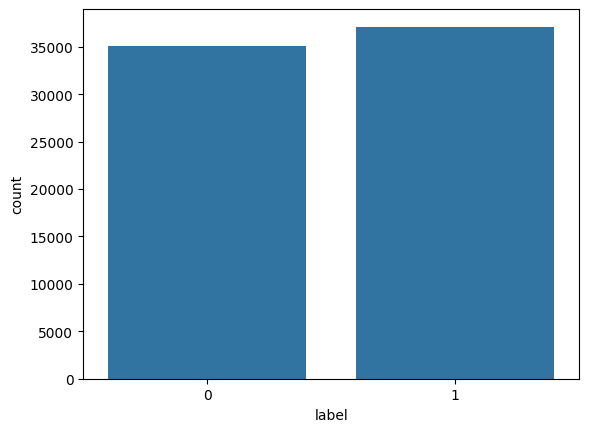

In [20]:
sns.countplot(x='label',data=df)


CREATE WORD CLOUDS

In [22]:
def plot_wordcloud(text,title):
  wordcloud= WordCloud(width=800, height=800, min_font_size=10, background_color='white').generate(text)
  plt.figure(figsize=(8,8))
  plt.imshow(wordcloud)
  plt.axis('off')

fake_text= ' '.join(df[df['label']==0]['text'])
real_text= ' '.join(df[df['label']==1]['text'])

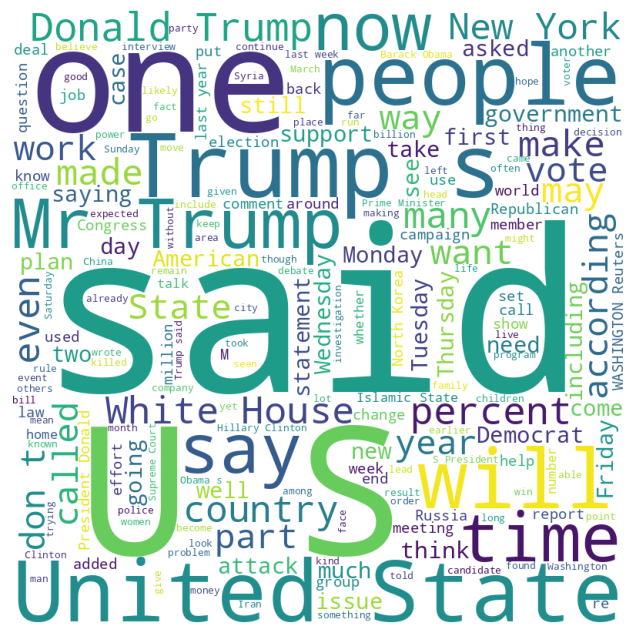

In [24]:
plot_wordcloud(fake_text,'Fake News')
plt.show()

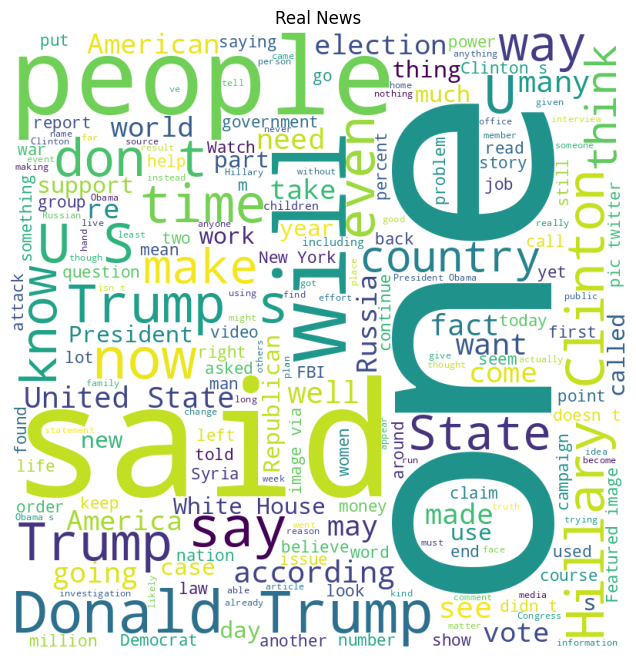

In [25]:
plot_wordcloud(real_text,'Real News')
plt.title('Real News')
plt.show()

In [43]:
textcolumn='text'
titlecolumn='title'

TEXT PRE-PROCESSING

In [44]:
#remove punctuation
import nltk
nltk.download('stopwords')
def preprocess_text(text):
  remove_punc= [char for char in text if char not in string.punctuation]
  clear_words= ''.join(remove_punc)

  #remove stopwords
  text= [word for word in clear_words.split() if word.lower() not in stopwords.words('english')]
  return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We seperate text and title into a variable. Then we need to use preprocess_text

In [ ]:
df[textcolumn] =df[textcolumn].apply(preprocess_text)
df[textcolumn].head()

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_text

df[textcolumn] = df[textcolumn].apply(lemmatize_text)

In [ ]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(df['textcolumn'])
y=df['label']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

all data is either 0 or 1, so no need to scale.......
here we use a function to evaluate a model

In [ ]:
def evaluate_model(model,xtest,ytest):

  accuracy= accuracy_score(ytest,model.predict(xtest))
  cm= confusion_matrix(ytest,model.predict(xtest))
  cr= classification_report(ytest,model.predict(xtest))
  prob= model.predict_proba(xtest)[:,1]
  roc_auc=roc_auc_score(ytest,prob)
  fpr,tpr,thresholds=roc_curve(ytest,prob)
  precision,recall,_=precision_recall_curve(ytest,prob)
  pr_auc=auc(recall,precision)
  return accuracy,cm,cr,roc_auc,fpr,tpr,thresholds,pr_auc,precision,recall




MULTINOMIAL NAIVE BAYES

In [ ]:
mnb_model=MultinomialNB()
mnb_model.fit(xtrain,ytrain)

In [ ]:
mnb= evaluate_model(mnb_model,xtest,ytest)
mnb

Bearnaulli

In [ ]:
bernoulli_model=BernoulliNB()
bernoulli_model.fit(xtrain,ytrain)

In [ ]:
bnb= evaluate_model(bernoulli_model,xtest,ytest)
bnb

Logistic Regression

In [ ]:
logis_model=LogisticRegression()
logis_model.fit(xtrain,ytrain)

In [ ]:
lgr= evaluate_model(logis_model,xtest,ytest)
lgr

GET USER INPUT AND MAKE A PREDICTION


In [ ]:
models= [mnb,bnb,lgr]


In [ ]:
random_text=input()

preprocessed_text=preprocess_text(random_text)
lemmatized_text=lemmatize_text(preprocessed_text)
vectorized_text=vectorizer.transform([lemmatized_text])

In [ ]:
for model in models:
  prediction=model.predict(vectorized_text)
  print(prediction)

SAVE good ML model for deployment